# XAI507 Computer Vision Assignment 1 - Part 2 (Renderer)

In [4]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from math import atan, sin, cos
import numpy as np


In [5]:
#helper functions as provided in assignment specs

def show_3d(vertices, edges):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    for edge in edges:
        p1 = vertices[edge[0]]
        p2 = vertices[edge[1]]
        ax.plot([p1[0], p2[0]],
                [p1[1], p2[1]],
                [p1[2], p2[2]])
    ax.set_ylim(-5, 5)
    ax.set_xlim(-5, 5)
    ax.set_zlim(-5, 5)
    plt.show()

def show_2d(vertices, edges, size):
    fig = plt.figure()
    ax = fig.gca()
    for edge in edges:
        p1 = vertices[edge[0]]
        p2 = vertices[edge[1]]
        ax.plot([p1[0], p2[0]],
                [p1[1], p2[1]])
    ax.set_xlim(0, size[0])
    ax.set_ylim(0, size[1])
plt.show()

<strong> i. define vertices and edges of cube </strong>

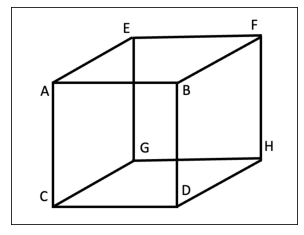

In [6]:
img = mpl.image.imread('attachments/cube.png')
imgplot = plt.imshow(img)
imgplot.axes.get_xaxis().set_visible(False)
imgplot.axes.get_yaxis().set_visible(False)
plt.show()

/var/folders/tz/w99r9ywn0nncx417bgnc6m1m0000gn/T/ipykernel_56075/1623768559.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


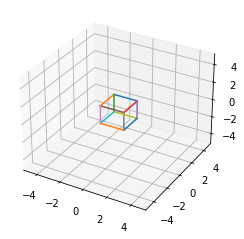

In [7]:
#define vertices
vertices = [(-1,1,1),(1,1,1),(-1,-1,1),(1,-1,1),(-1,1,-1),(1,1,-1),(-1,-1,-1),(1,-1,-1)]

#define connected edges
edges = [(0,1),(0,2),(0,4),(1,3),(1,5),(2,3),(2,6),(3,7),(4,5),(4,6),(5,7),(6,7)]

#plot
show_3d(vertices,edges)

<strong> ii. define rotation and translation matrix to find extrinsic matrix. </strong> </br>
Turn points to homogenous and non-homogenous as required. </br>
Camera position = [0,0,-2.5] </br>
Camera orientation = [0,0.1,0]

In [8]:
#rotation matrix based on formula provided in assignment spec. Add extra row/column to make dimension equal to tranlsation matrix
def rotationMatrix(u,theta):
    ux = u[0]
    uy = u[1]
    uz = u[2]
    ct = cos(theta)
    st = sin(theta)
    row1= [ct+ux**2*(1-ct), ux*uy*(1-ct)-uz*st, ux*uz*(1-ct)+uy*st,0]
    row2 = [uy*ux*(1-ct)+uz*st, ct+uy**2*(1-ct), uy*ux*(1-ct)-ux*st,0]
    row3 = [uz*ux*(1-ct)-uy*st, uz*uy*(1-ct)+ux*st, ct+uz**2*(1-ct),0]
    row4 = [0,0,0,1]
    return [row1,row2,row3,row4]

#translation matrix as per lecture slides
def translateMatrix(x_trans,y_trans,z_trans):
    row1 = [1,0,0,-x_trans]
    row2 = [0,1,0,-y_trans]
    row3 = [0,0,1,-z_trans]
    row4 = [0,0,0,1]
    return [row1, row2, row3, row4]

#function to normalise a vector
def normaliseVector(A):
    return A/np.linalg.norm(A)

#function to find angle between two vectors in radians
def findAngle(A,B):
    mag_A = np.sqrt(A[0]**2+A[1]**2+A[2]**2)
    mag_B = np.sqrt(B[0]**2+B[1]**2+B[2]**2)
    normalise_A = normaliseVector(A)
    normalise_B = normaliseVector(B)
    angle = np.arccos(np.dot(normalise_A,normalise_B))
    return angle

#gets the angle required to rotate given camera orientation vector for direction x, y or z.
def getVectorsRotation(orientation, direction):
    if (direction=="x"):
        x_value = orientation[0]
        if x_value==0:
            return 0
        else:
            return findAngle([1,0,0],[x_value,0,0])
    elif (direction=="y"):
        y_value = orientation[1]
        if y_value==0:
            return 0
        else:
            return findAngle([0,1,0],[0,y_value,0])
    else:
        z_value = orientation[2]
        if z_value==0:
            return 0
        else:
            return findAngle([0,0,1][0,0,z_value])

#returns the final 4x4 extrinisc matrix based on homogenous coordinates
def get_extrinsic_matrix(position, orientation):
    #calculate angle between position and orientation
    angle_x = getVectorsRotation(orientation, "x")
    angle_y = getVectorsRotation(orientation, "y")
    angle_z = getVectorsRotation(orientation, "z")
    #rotate around x-axis and y-axis.
    matrix_mult1 = np.matmul(rotationMatrix([1,0,0],angle_x), rotationMatrix([0,1,0],angle_y)) 
    #then rotate around z-axis
    matrix_mult2 = np.matmul(matrix_mult1, rotationMatrix([0,0,1],angle_z))
    #then translate
    translation_matrix = translateMatrix(position[0],position[1],position[2])
    matrix_mult3 = np.matmul(matrix_mult2,translation_matrix)
    return matrix_mult3

#turns an array of points into homogenous coordinates
def to_homogenous(points): 
    hom_points = []
    for point in points:
        point = point + [1]
        hom_points.append(point)
    return np.array(hom_points)

#converts an array of homogenous coordinates into proper 3D or 2D coordinates
def from_homogenous(points):
    non_hom_points = []
    for point in points:
        divisor = point[-1]
        new_point = []
        for coord in point:
            new_point.append(coord/divisor)
        non_hom_points.append(new_point[:-1])
    return np.array(non_hom_points)
            
     

<>:54: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:54: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
/var/folders/tz/w99r9ywn0nncx417bgnc6m1m0000gn/T/ipykernel_56075/1565117094.py:54: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  return findAngle([0,0,1][0,0,z_value])


/var/folders/tz/w99r9ywn0nncx417bgnc6m1m0000gn/T/ipykernel_56075/1623768559.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


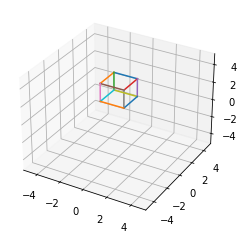

In [9]:
position = [0,0,-2.5]
orientation = [0,0.1,0]

#transform cube coordinates into homogenous points
vertices_list = []
for point in vertices:
    vertices_list.append(list(point))
hom_vertices = np.array(to_homogenous(vertices_list))

#get extrinsic matrix
extrinsic_matrix = get_extrinsic_matrix(position, orientation)

#transform vertices by multiplying with extrinsic matrix
vertices_transformed = []
non_hom_vertices_transformed = []
for point in hom_vertices:
    mat = np.matmul(extrinsic_matrix, point.transpose())
    vertices_transformed.append(mat)

#turn back to non-homogenous matrix for the purpose of plotting
non_hom_vertices_transformed = from_homogenous(vertices_transformed)
show_3d(non_hom_vertices_transformed, edges)

<strong> iii. get intrinsic matrix, transform camera coordinates into projected coordinates and plot 2D image. </strong> </br>
Turn points into homogenous and non-homogenous as required.

In [10]:
#function that creates the full intrinsic transofrmation including the projection matrix
def get_intrinsic_matrix(f,s):
    K = np.array([[f,0,s[0]],[0,f,s[1]],[0,0,1]])
    mat = [[1,0,0,0],[0,1,0,0],[0,0,1,0]]
    return np.matmul(K,mat)

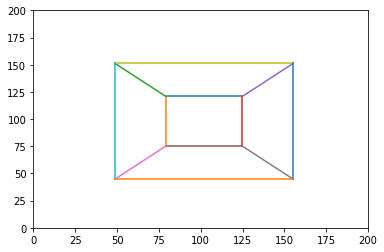

In [11]:
#set focal length and pixel sizes
f = 0.4
s = (0.51, 0.49)

#get intrinsic matrix
intrinsic_matrix = get_intrinsic_matrix(f,s)


#transform camera coordinates into projected coordinates
image = []
for point in vertices_transformed:
    image.append(np.matmul(intrinsic_matrix, point))

#convert to non-homogenous matrix
image = from_homogenous(image)    

#resize image to use helper-function show_2D.
image_resized = np.array(image)*200

#plot image
show_2d(image_resized, edges, [200,200])